In [1]:
# Import libraries
import os                          # for directory manipulation
import pandas as pd                # for DataFrame manipulation
import numpy as np                 # for numerical operations
import matplotlib.pyplot as plt    # for plotting graphs
import seaborn as sns              # for statistical visualizations
import re                          # for using regular expressions

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Load & Inspect the Dataset

In [2]:
# Get the directory of the script's location, assumed here to be '../notebooks' and to be on the same folder level with '../data'
script_dir = os.getcwd()
# Please note that os.getcwd() depends on the current working directory, which might not always align with the script's location  

# Navigate to the parent folder
parent_dir = os.path.abspath(os.path.join(script_dir, ".."))

# Construct the path to the Excel file in the desired relative location
raw_data_path = os.path.join(parent_dir, "data", "raw", "redfin_hollywood_hills.csv")

# Read the Excel file into a DataFrame
base_redfin_df = pd.read_csv(raw_data_path)

### Helper functions

In [3]:
# Function to get quick overview of dataset
def get_quick_view(df):
    """
    This function uses the head(), tail(), info() and shape() methods to display the general information about the dataset.
    """
    print('Quick Overview of the dataset')
    print("\033[1m" + '-'*100 + "\033[0m")
    print()
    print('First 5 records of the dataset')
    display(df.head())
    print('-'*100)
    print()
    print('Last 5 records of the dataset')
    display(df.tail())
    print('-'*100)
    print()
    print('10 randomly selected records from the dataset')
    display(df.sample(n=10, random_state=42))
    print('-'*100)

#get_quick_view(df)

# Function to summarize dataset
def get_summary_info(df):
    print("Rows     : " , df.shape[0])
    print("Columns  : " , df.shape[1])
    print("\nDuplicate values : ", df.duplicated().sum())
    print()
    print('Dataset structure (feature names, datatypes, etc')
    print()
    display(df.info())

#get_summary_info(df)


In [4]:
# checking basic info
get_quick_view(base_redfin_df)

Quick Overview of the dataset
----------------------------------------------------------------------------------------------------

First 5 records of the dataset


,Listing ID,Price,Address,Beds,Baths,SqFt,Link,Image URL,Latitude,Longitude
0,51585585,"$1,000,000","3450 Cahuenga Blvd W #905, Los Angeles, CA 90068",2 beds,2.5 baths,"1,921",https://www.redfin.com/CA/Los-Angeles/3450-Cah...,https://ssl.cdn-redfin.com/system_files/media/...,34.132737,-118.353523
1,193007181,"$1,850,000","3649 Regal Pl #404, Los Angeles, CA 90068",3 beds,3 baths,"1,731",https://www.redfin.com/CA/Los-Angeles/3649-Reg...,https://ssl.cdn-redfin.com/photo/40/islphoto/7...,34.134235,-118.362094
2,21925088,"$5,950,000","6446 W Weidlake Dr, Los Angeles, CA 90068",4 beds,5 baths,"6,204",https://www.redfin.com/CA/Los-Angeles/6446-Wei...,https://ssl.cdn-redfin.com/photo/40/islphoto/8...,34.115735,-118.329856
3,7129663,"$1,525,000","2434 Cazaux Pl, Los Angeles, CA 90027",3 beds,2 baths,"1,459",https://www.redfin.com/CA/Los-Angeles/2434-Caz...,https://ssl.cdn-redfin.com/photo/40/islphoto/3...,34.115406,-118.314666
4,7127106,"$600,000","1942 Grace Ave #223, Los Angeles, CA 90068",2 beds,2 baths,"1,116",https://www.redfin.com/CA/Los-Angeles/1942-Gra...,https://ssl.cdn-redfin.com/photo/45/islphoto/4...,34.106665,-118.331869


----------------------------------------------------------------------------------------------------

Last 5 records of the dataset


,Listing ID,Price,Address,Beds,Baths,SqFt,Link,Image URL,Latitude,Longitude
250,193686784,"$125,750","0 Vanland Trl, Los Angeles, CA 90068",— beds,— baths,—,https://www.redfin.com/CA/Los-Angeles/Vanland-...,https://ssl.cdn-redfin.com/photo/45/islphoto/8...,34.122682,-118.344520
251,194187392,"$375,000","2354 Holly Dr, Los Angeles, CA 90068",— beds,— baths,—,https://www.redfin.com/CA/Los-Angeles/2354-Hol...,https://ssl.cdn-redfin.com/photo/45/islphoto/6...,34.114370,-118.330340
252,194236727,"$1,100,000","6448 Weidlake Dr, Los Angeles, CA 90068",— beds,— baths,—,https://www.redfin.com/CA/Los-Angeles/6448-Wei...,https://ssl.cdn-redfin.com/photo/40/islphoto/4...,34.115930,-118.329900
253,21833148,"$139,000","5894 Lorae Pl, Los Angeles, CA 90068",— beds,— baths,—,https://www.redfin.com/CA/Los-Angeles/5894-Lor...,https://ssl.cdn-redfin.com/photo/45/islphoto/0...,34.117799,-118.317805
254,57191614,"$239,500","7218 Sunnydip Trl, Hollywood Hills, CA 90068",— beds,— baths,—,https://www.redfin.com/CA/Los-Angeles/7218-Sun...,https://ssl.cdn-redfin.com/photo/45/islphoto/7...,34.122419,-118.348710


----------------------------------------------------------------------------------------------------

10 randomly selected records from the dataset


,Listing ID,Price,Address,Beds,Baths,SqFt,Link,Image URL,Latitude,Longitude
190,5315109,"$2,098,000","6907 Treasure Trl, Hollywood Hills, CA 90068",4 beds,5 baths,"3,982",https://www.redfin.com/CA/Los-Angeles/6907-Tre...,https://ssl.cdn-redfin.com/photo/45/islphoto/8...,34.124533,-118.345380
6,7130481,"$950,000","2536 Vasanta Way, Los Angeles, CA 90068",2 beds,2 baths,"1,362",https://www.redfin.com/CA/Los-Angeles/2536-Vas...,https://ssl.cdn-redfin.com/photo/40/islphoto/8...,34.115813,-118.323865
79,7127678,"$1,890,000","6389 La Punta Dr, Los Angeles, CA 90068",3 beds,3.5 baths,"2,389",https://www.redfin.com/CA/Los-Angeles/6389-La-...,https://ssl.cdn-redfin.com/photo/40/islphoto/5...,34.114238,-118.328344
205,51585562,"$1,349,000","3450 Cahuenga Blvd #410, Los Angeles, CA 90068",2 beds,2.5 baths,"2,360",https://www.redfin.com/CA/Los-Angeles/3450-Cah...,https://ssl.cdn-redfin.com/photo/40/islphoto/8...,34.132737,-118.353523
117,7114884,"$1,998,000","1954 Pinehurst Rd, Los Angeles, CA 90068",3 beds,2 baths,"2,363",https://www.redfin.com/CA/Los-Angeles/1954-Pin...,https://ssl.cdn-redfin.com/photo/40/islphoto/6...,34.106230,-118.340349
185,5312645,"$1,250,000","3124 Goodview Trl, Los Angeles, CA 90068",1 bed,1 bath,695,https://www.redfin.com/CA/Los-Angeles/3124-Goo...,https://ssl.cdn-redfin.com/photo/45/islphoto/3...,34.124802,-118.349237
201,7132175,"$3,625,000","5667 Tryon Rd, Los Angeles, CA 90068",4 beds,4 baths,"3,976",https://www.redfin.com/CA/Los-Angeles/5667-Try...,https://ssl.cdn-redfin.com/photo/40/islphoto/6...,34.107879,-118.311298
167,79040846,"$1,295,000","6760 W Gill Way, Los Angeles, CA 90068",3 beds,4 baths,"1,859",https://www.redfin.com/CA/Los-Angeles/6760-Gil...,https://ssl.cdn-redfin.com/photo/40/islphoto/9...,34.119386,-118.340921
9,7114421,"$570,000","6700 Hillpark Dr #302, Los Angeles, CA 90068",2 beds,2 baths,"1,059",https://www.redfin.com/CA/Los-Angeles/6700-Hil...,https://ssl.cdn-redfin.com/photo/45/islphoto/5...,34.117695,-118.338887
30,7128368,"$2,095,000","6467 Deep Dell Pl, Los Angeles, CA 90068",3 beds,3 baths,"3,598",https://www.redfin.com/CA/Los-Angeles/6467-Dee...,https://ssl.cdn-redfin.com/photo/40/islphoto/7...,34.115343,-118.330722


----------------------------------------------------------------------------------------------------


In [5]:
# Summarize our dataset
get_summary_info(base_redfin_df)

Rows     :  255
Columns  :  10

Duplicate values :  0

Dataset structure (feature names, datatypes, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Listing ID  255 non-null    int64  
 1   Price       255 non-null    object 
 2   Address     255 non-null    object 
 3   Beds        255 non-null    object 
 4   Baths       255 non-null    object 
 5   SqFt        255 non-null    object 
 6   Link        255 non-null    object 
 7   Image URL   255 non-null    object 
 8   Latitude    255 non-null    float64
 9   Longitude   255 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 20.1+ KB


None

## Step 2: Handling Missing Data

In [8]:
# Create a copy of base data for manupulation & processing
redfin_df = base_redfin_df.copy()

In [9]:
# Function to clean dataset
def clean_data(df):
    print("\nHandling Missing Data...")
    
    # Replace invalid values with NaN
    df.replace({'—': np.nan, 'N/A': np.nan, '': np.nan}, inplace=True)
    
    # Drop rows with missing essential values
    df.dropna(subset=["Price", "Beds", "Baths", "SqFt"], inplace=True)
    
    # Reset index
    df.reset_index(drop=True, inplace=True)
    
    print(f"Cleaned Data: {len(df)} rows remaining.")
    return df


In [10]:
redfin_df = clean_data(redfin_df)


Handling Missing Data...
Cleaned Data: 216 rows remaining.


In [11]:
# Helper function to handle rows with missing geo-location data
def handle_missing_geo(df):
    missing_geo = df[df['Latitude'].isna() | df['Longitude'].isna()]
    if not missing_geo.empty:
        print(f"\nWarning: {len(missing_geo)} listings are missing geo-coordinates.")
        df = df.dropna(subset=['Latitude', 'Longitude'])  # Drop listings without location data
        print(f"{len(df)} listings retained after removing missing geo-coordinates.")
    return df

In [12]:
redfin_df = handle_missing_geo(redfin_df)

### Step 3: Formatting Data

Scraped data is often stored as text. We need to convert numerical columns to the correct types

In [13]:
# Helper functions to handle format issues

def extract_numeric(value):
    """Extracts numeric values from a string. Handles cases like '1 bed', '2 baths', 'Studio'."""
    if isinstance(value, str):
        match = re.search(r'\d+', value)  # Find first numeric value
        return float(match.group()) if match else np.nan
    return np.nan

def convert_columns(df):
    print("Converting Columns...")
    
    # Strip whitespace from all columns
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    #df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
    
    # Convert Price column: Remove "$" and ",", then convert to float
    df['Price'] = df['Price'].str.replace('[$,]', '', regex=True).replace('', np.nan).astype(float)
    
    # Convert SqFt column
    df['SqFt'] = df['SqFt'].replace(['—', '', 'N/A'], np.nan)
    df['SqFt'] = df['SqFt'].str.replace(',', '', regex=True)
    df['SqFt'] = pd.to_numeric(df['SqFt'], errors='coerce')
    
    # Convert Beds & Baths
    df['Beds'] = df['Beds'].apply(extract_numeric)
    df['Baths'] = df['Baths'].apply(extract_numeric)
    
    # Convert Latitude & Longitude to float
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
    
    print("Data Cleaning Complete!")
    return df


In [14]:
redfin_df = convert_columns(redfin_df)

Converting Columns...
Data Cleaning Complete!


C:\Users\HP\AppData\Local\Temp\ipykernel_9276\1617899130.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


## Step 4: Data Analysis & Visualization

Summary Statistics

In [15]:
# Helper function to summarize key statistics

# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
# Count is the count of non-null observations (i.e. rows)
# Mean is the average of values for the given column
# Std is standard deviation - how far off from the mean the values are
# Min is the minimum amount of the value
# 25% is the 25th percentile 
# 50% is the 50th percentile
# 75% is the 75th percentile
# max is the maximum amount of the value
def show_summary_statistics(df):
    print('Descriptive Statistics of numerical variables')
    display(df.describe().T)
    print('-'*100)
    print()
    print('Descriptive Statistics of categorical variables')
    display(df.describe(include='object').T)
    print()

In [16]:
show_summary_statistics(redfin_df)

Descriptive Statistics of numerical variables


,count,mean,std,min,25%,50%,75%,max
Listing ID,216.0,2.327779e+07,4.763955e+07,5.253353e+06,7.126636e+06,7.128751e+06,7.131860e+06,1.962133e+08
Price,216.0,2.415485e+06,2.215298e+06,3.990000e+05,1.200000e+06,1.800000e+06,2.696250e+06,1.788800e+07
Beds,216.0,3.435185e+00,1.958990e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.400000e+01
Baths,216.0,3.199074e+00,1.900355e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.200000e+01
SqFt,216.0,2.683394e+03,1.706680e+03,1.620000e+02,1.553250e+03,2.335500e+03,3.368000e+03,1.402900e+04
Latitude,216.0,3.411831e+01,9.806253e-03,3.410178e+01,3.411004e+01,3.411696e+01,3.412702e+01,3.413783e+01
Longitude,216.0,-1.183360e+02,1.385283e-02,-1.183638e+02,-1.183458e+02,-1.183371e+02,-1.183244e+02,-1.183083e+02


----------------------------------------------------------------------------------------------------

Descriptive Statistics of categorical variables


,count,unique,top,freq
Address,216,216,"3450 Cahuenga Blvd W #905, Los Angeles, CA 90068",1
Link,216,216,https://www.redfin.com/CA/Los-Angeles/3450-Cah...,1
Image URL,216,216,https://ssl.cdn-redfin.com/system_files/media/...,1


In [17]:
# checking for duplicates using Unique ID
redfin_df.duplicated(subset=['Listing ID']).sum()

0

## Step 5: Visualizing Trends

Let's visualize key trends to better understand the market

In [18]:
# Function to plot Price Distribution

def plot_price_distribution(df):
    plt.figure(figsize=(10,5))
    sns.histplot(df['Price'], bins=30, kde=True)
    plt.xlabel("Price (in millions)")
    plt.ylabel("Count")
    plt.title("Price Distribution of Listings")
    plt.show()

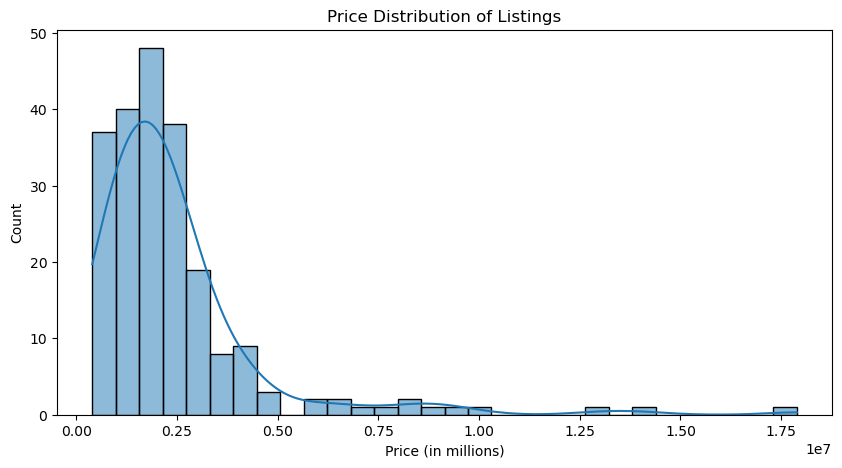

In [19]:
plot_price_distribution(redfin_df)

In [20]:
# Function to plot Bedroom & Bathroom Distribution - to understand typical property sizes in the dataset

def analyze_beds_baths(df):
    plt.figure(figsize=(10,5))
    sns.countplot(x='Beds', data=df, order=sorted(df['Beds'].dropna().unique()))
    plt.xlabel("Number of Bedrooms")
    plt.ylabel("Count")
    plt.title("Distribution of Bedrooms in Listings")
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.countplot(x='Baths', data=df, order=sorted(df['Baths'].dropna().unique()))
    plt.xlabel("Number of Bathrooms")
    plt.ylabel("Count")
    plt.title("Distribution of Bathrooms in Listings")
    plt.show()

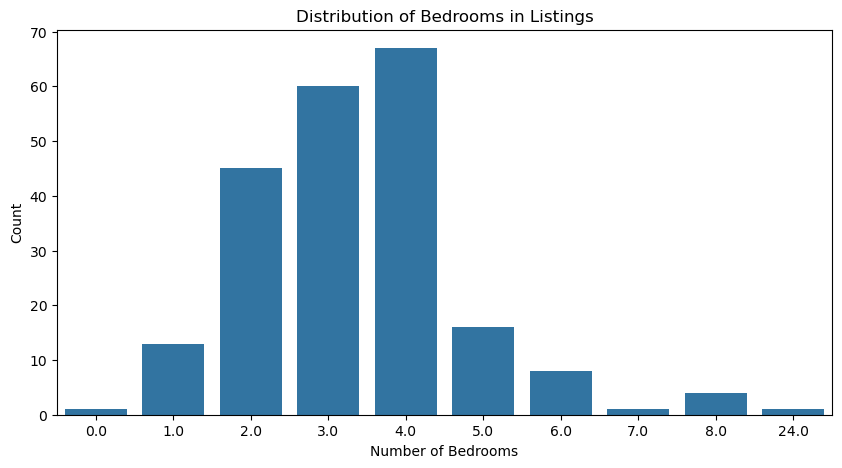

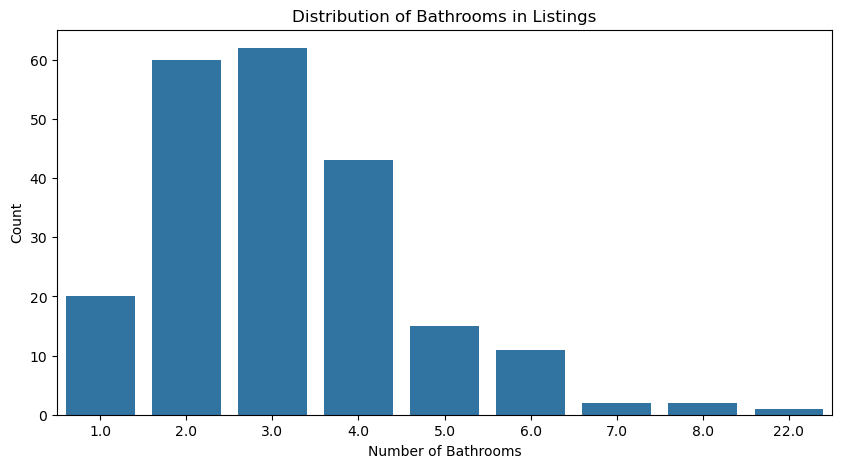

In [21]:
analyze_beds_baths(redfin_df)

In [24]:
# Function to show Top & Bottom Listings - look at the most expensive and cheapest listings to get a sense of market extremes

def show_extreme_listings(df):
    print("\nTop 5 Most Expensive Listings:")
    display(df.nlargest(5, 'Price'))
    print("\nTop 5 Cheapest Listings:")
    display(df.nsmallest(5, 'Price'))

In [25]:
show_extreme_listings(redfin_df)


Top 5 Most Expensive Listings:


,Listing ID,Price,Address,Beds,Baths,SqFt,Link,Image URL,Latitude,Longitude
177,22397077,17888000.0,"7305 Pyramid Pl, Los Angeles, CA 90046",7.0,8.0,9200,https://www.redfin.com/CA/Los-Angeles/7305-Pyr...,https://ssl.cdn-redfin.com/photo/40/islphoto/2...,34.120179,-118.351898
121,77510960,13999000.0,"7100 La Presa Dr, Los Angeles, CA 90068",6.0,7.0,8385,https://www.redfin.com/CA/Los-Angeles/7100-La-...,https://ssl.cdn-redfin.com/photo/40/islphoto/5...,34.107836,-118.342920
175,7114695,12995000.0,"2321 Castillian Dr, Los Angeles, CA 90068",5.0,6.0,9000,https://www.redfin.com/CA/Los-Angeles/2321-Cas...,https://ssl.cdn-redfin.com/photo/45/islphoto/3...,34.112479,-118.343611
195,7131845,9800000.0,"5630 Valley Oak Dr, Los Angeles, CA 90068",4.0,5.0,8244,https://www.redfin.com/CA/Los-Angeles/5630-Val...,https://ssl.cdn-redfin.com/photo/40/islphoto/8...,34.111055,-118.312150
69,7129883,9200000.0,"3306 Deronda Dr, Los Angeles, CA 90068",3.0,3.0,3137,https://www.redfin.com/CA/Los-Angeles/3306-Der...,https://ssl.cdn-redfin.com/photo/40/islphoto/3...,34.127898,-118.319300



Top 5 Cheapest Listings:


,Listing ID,Price,Address,Beds,Baths,SqFt,Link,Image URL,Latitude,Longitude
163,7127468,399000.0,"2260 N Cahuenga Blvd #203, Los Angeles, CA 90068",1.0,1.0,853,https://www.redfin.com/CA/Los-Angeles/2260-N-C...,https://ssl.cdn-redfin.com/photo/40/islphoto/7...,34.111506,-118.332998
57,7128073,465000.0,"3480 Barham Blvd #215, Los Angeles, CA 90068",1.0,1.0,812,https://www.redfin.com/CA/Los-Angeles/3480-Bar...,https://ssl.cdn-redfin.com/photo/45/islphoto/6...,34.135386,-118.341835
38,7127368,489000.0,"1940 N Highland Ave #10, Los Angeles, CA 90068",2.0,2.0,980,https://www.redfin.com/CA/Los-Angeles/1940-N-H...,https://ssl.cdn-redfin.com/photo/45/islphoto/2...,34.106480,-118.336836
103,7128084,490000.0,"3480 Barham Blvd #226, Los Angeles, CA 90068",1.0,1.0,812,https://www.redfin.com/CA/Los-Angeles/3480-Bar...,https://ssl.cdn-redfin.com/photo/40/islphoto/7...,34.135386,-118.341835
214,17138915,490000.0,"6253 Hollywood Blvd #309, Los Angeles, CA 90028",1.0,1.0,850,https://www.redfin.com/CA/Los-Angeles/6253-Hol...,https://ssl.cdn-redfin.com/photo/45/islphoto/3...,34.101776,-118.326279


## Save the cleaned dataset

In [26]:
# Construct the path to the cleaned CSV file in the desired relative location
path_to_file = os.path.join(parent_dir, "data", "cleaned", "redfin_hollywood_hills_cleaned.csv")

# Save the cleaned dataset
redfin_df.to_csv(path_to_file,index=False)

print(f"Cleaned data saved to {path_to_file}")

Cleaned data saved to C:\Users\HP\Desktop\MyWorkSpace\property-pulse\data\cleaned\redfin_hollywood_hills_cleaned.csv
